# Explore lightcurve for a DDF candidate interactively

Use the matplotlib interactive widget to create interactive plots with a box-zoom feature.

## Import Packages

In [19]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

## Read the data file for all candidates 

In [20]:
fnm = '../extragalactic_fields/source_detection_summary_files/candidates.dat'
cand_field    = np.loadtxt(fnm, dtype='str',   usecols=(0))
cand_id       = np.loadtxt(fnm, dtype='str',   usecols=(1))
cand_ra       = np.loadtxt(fnm, dtype='float', usecols=(2))
cand_dec      = np.loadtxt(fnm, dtype='float', usecols=(3))
cand_cobj     = np.loadtxt(fnm, dtype='int',   usecols=(4))
cand_meanrb   = np.loadtxt(fnm, dtype='float', usecols=(5))
cand_stdrb    = np.loadtxt(fnm, dtype='float', usecols=(6))
cand_tspan    = np.loadtxt(fnm, dtype='float', usecols=(7))
cand_amp      = np.loadtxt(fnm, dtype='float', usecols=(8))
cand_cobj_g   = np.loadtxt(fnm, dtype='int',   usecols=(9))
cand_meanrb_g = np.loadtxt(fnm, dtype='float', usecols=(10))
cand_stdrb_g  = np.loadtxt(fnm, dtype='float', usecols=(11))
cand_tspan_g  = np.loadtxt(fnm, dtype='float', usecols=(12))
cand_amp_g    = np.loadtxt(fnm, dtype='float', usecols=(13))
cand_cobj_r   = np.loadtxt(fnm, dtype='int',   usecols=(14))
cand_meanrb_r = np.loadtxt(fnm, dtype='float', usecols=(15))
cand_stdrb_r  = np.loadtxt(fnm, dtype='float', usecols=(16))
cand_tspan_r  = np.loadtxt(fnm, dtype='float', usecols=(17))
cand_amp_r    = np.loadtxt(fnm, dtype='float', usecols=(18))
cand_cobj_i   = np.loadtxt(fnm, dtype='int',   usecols=(19))
cand_meanrb_i = np.loadtxt(fnm, dtype='float', usecols=(20))
cand_stdrb_i  = np.loadtxt(fnm, dtype='float', usecols=(21))
cand_tspan_i  = np.loadtxt(fnm, dtype='float', usecols=(22))
cand_amp_i    = np.loadtxt(fnm, dtype='float', usecols=(23))
del fnm

## Read the data file of intra-night photometry

Detections in all of the individual difference images.

In [21]:
fnm = '../extragalactic_fields/source_detection_summary_files/candidate_objects.dat'
obj_field  = np.loadtxt(fnm, dtype='str',   usecols=(0))
obj_candid = np.loadtxt(fnm, dtype='str',   usecols=(1))
obj_id     = np.loadtxt(fnm, dtype='str',   usecols=(2))
obj_ra     = np.loadtxt(fnm, dtype='float', usecols=(3))
obj_dec    = np.loadtxt(fnm, dtype='float', usecols=(4))
obj_mjd    = np.loadtxt(fnm, dtype='float', usecols=(5))
obj_filter = np.loadtxt(fnm, dtype='str',   usecols=(6))
obj_mag    = np.loadtxt(fnm, dtype='float', usecols=(7))
obj_mage   = np.loadtxt(fnm, dtype='float', usecols=(8))
obj_rb     = np.loadtxt(fnm, dtype='float', usecols=(9))
obj_expid  = np.loadtxt(fnm, dtype='int',   usecols=(10))
del fnm

## Read the data file of nightly epoch photometry

Combine for a given night all of the detections in the individual difference images.

In [22]:
fnm = '../extragalactic_fields/candidate_nightly_epochs_files/candidate_lightcurves.dat'
candLC_field  = np.loadtxt(fnm, dtype='str',   usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str',   usecols=(1))
candLC_cal    = np.loadtxt(fnm, dtype='str',   usecols=(2))
candLC_mjd    = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str',   usecols=(4))
candLC_Nobj   = np.loadtxt(fnm, dtype='int',   usecols=(5))
candLC_mag    = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage   = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb    = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_maglim = np.loadtxt(fnm, dtype='float', usecols=(9))
del fnm

## Set some plotting parameters

In [23]:
all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','*']
all_fsizes  = [5, 5, 7]

When plotting multiple filters together, it can be helpful to "separate" them in the y-axis by adding or subtracting an "offset". This is just done so that the points don't overlap.

The `all_soffset` array is the offset in strings, so it can easily be added to the legend label.

In [24]:
all_offset  = [-1.0, 0.0, 1.0]
all_soffset = [' -1','',' +1']
# all_offset  = [0.0, 0.0, 0.0]
# all_soffset = ['','','']

## Name the DDF candidate to use

In [25]:
use_candid = 'DC21bckq'

## Index the photometry associated with this candidate

In [26]:
ox = np.where(obj_candid == use_candid)[0]
cx = np.where(candLC_candid == use_candid)[0]

## Make the interactive plot

When you hover your mouse over the plot, a menu of icons will appear.

Select the box to enable box zoom. Click and drag in the plot to make a box and zoom in.

Click the house icon to return "home" (to the default display, no zoom).

> **NOTE**: The nightly epoch photometry points are connected with a faint line, so that when you zoom in to just one night of data, you can still see the inter-night trend (brightening or fading, by the slope of the line). Unconnected points mean there was a non-detection (i.e., AGN had faded below detectability) in between the two nights.

> **ALSO NOTE**: The x-axis has been converted from MJD to *minutes*, so that when zoomed in, the plot gives a better sense of the time between intra-night data points.

> **AND**: The detection limits clutter up this plot and disappear when zoomed in anyways, so I commented them out for now.

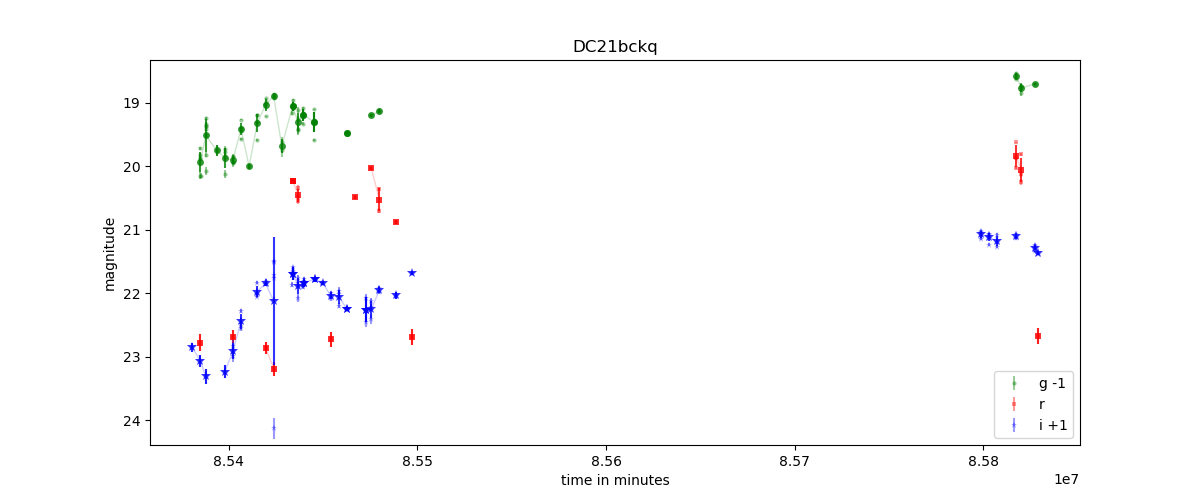

In [27]:
fig = plt.figure(figsize=(12,5))

### Define the y limits of the plot based on max/min magnitudes
y1 = np.min(obj_mag[ox]) - 1.2
y2 = np.max(obj_mag[ox]) + 1.2

for f,filt in enumerate(all_filters):
    
    ### intra-night photometry
    fx = np.where(obj_filter[ox] == filt)[0]
    plt.errorbar(obj_mjd[ox[fx]]*24.0*60.0, obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
                 fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    del fx
    
    ### nightly-epoch photometry
    fx = np.where(candLC_filter[cx] == filt)[0]
    plt.plot(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f],
             ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    plt.errorbar(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
                 fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])

    ### nightly-epoch detection limits
    # lx = np.where(np.isnan(candLC_mag[cx[fx]]) == 1)[0]
    # plt.plot(candLC_mjd[cx[fx[lx]]]*24.0*60.0, candLC_maglim[cx[fx[lx]]] + all_offset[f],
    #          all_fshapes[f], ms=5, alpha=0.6, mew=0, color='grey' )
    # del fx, lx

plt.ylim([y2, y1])
del y1, y2

plt.xlabel('time in minutes')
plt.ylabel('magnitude')
plt.legend(loc='best')
plt.title(use_candid)

plt.show()